# Численные методы решения нелинейных уравнений

Численные методы приближенны, имеют определенную погрешность. В лабораторной работе — многочлены третьей степени (три корня).

Если на интервале $[a; b]$, где $f(a)$ и $f(b)$ имеют разные знаки, функция непрерывна и монотонна, то на этом интервале есть корень, причем один. Такой интервал называется _интервалом изоляции корня_.

Перед выполнением работы строится график функции, отделяются интервалы изоляции корня.

Один из методов — _метод половинного деления_. Предположим, что найден интервал $[a; b]$, на концах которого функция имеет разные знаки. В цикле интервал изоляции корня делится пополам, в точке $x_0 = a + b / 2$ рассчитывается знак, выбирается интервал $[a; x_0]$ или $[x_0; b]$ (тот, на концах которого функция имеет разные знаки). Критерий выхода из итерационного цикла: длина полученного интервала меньше или равна погрешности __(?)__ или значение функции в одном из $x_n$ соизмеримо с погрешностью ($f(x_n) \approx 0$).

Ответ необходимо сверить с ответом, полученным математическим пакетом.

## Требования к программе

Входные данные: границы интервала ($a$ и $b$), погрешность. Должна осуществляться проверка (на концах интервала функция имеет разные знаки, произведение значений на концах < 0).

Выходные данные: корень, значение функции в корне (не должно не превышать погрешность), число итераций.

## График функции

$x^3 + 2.28x^2 - 1.934x + 3.907$

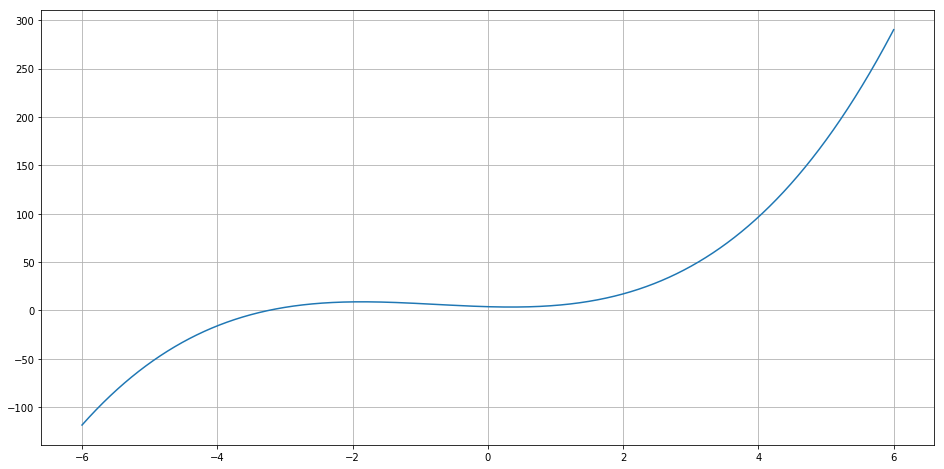

In [31]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return (x**3) + (2.28 * x**2) - (1.934 * x) + 3.907

x = np.array(np.arange(-6, 6, step=0.001))  
y = f(x)
plt.figure(figsize=(16,8))
plt.plot(x, y)
plt.grid()
plt.show()

In [48]:
def divide_interval(a, b):
  x_0 = (a + b) / 2
  if f(a) * f(x_0) < 0: return (a, x_0)
  else: return (x_0, b)
  
def interval_len(a, b):
  return abs(a - b)

def recurse(a, b, delta, iternum):
  (new_a, new_b) = divide_interval(a, b)    
  if interval_len(new_a, new_b) < delta:
    x_between = (new_a + new_b) / 2
    return (x_between, f(x_between), iternum)
  elif abs(f(new_a)) - delta <= 0:
    return (new_a, f(new_a), iternum)
  elif abs(f(new_b)) - delta <= 0:
    return (new_b, f(new_b), iternum)
  else:
    return recurse(new_a, new_b, delta, iternum + 1)

print('Введите а:')
a = float(input())
print('Введите b:')
b = float(input())
print('Введите погрешность:')
delta = abs(float(input()))

if f(a) * f(b) < 0:
  (x, f_x, iternum) = recurse(a, b, delta, 1)
  print(f'Полученный x: {x:6f}, значение функции: {f_x:6f}, число итераций: {iternum}')
else:
  print(f'Ошибка: значения функции в концах интервала имеют одинаковый знак')

Введите а:
-4.8
Введите b:
2.3
Введите погрешность:
0.01
Полученный x: -3.246875, значение функции: -0.006531, число итераций: 5
